## Project Instructions

Perform exploratory data analysis on the netflix_data.csv data to understand more about movies from the 1990s decade.

What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called **duration** (use 1990 as the decade's start year).

A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as **short_movie_count**.

## How to approach the project:

**1. Filter the data for movies released in the 1990s:**
You'll want to subset the DataFrame to keep only the movies and then filter the years so that you are working with rows where the release year is between 1990 and 1999.

**2. Find the most frequent movie duration:**
Visualize the data to view the distributions of durations for movies released in the 1990s.

**3. Count the number of short action movies from the 1990s:**
First, subset the data again to keep only movies with the correct genre. Then, iterate through the data and count the number of movies depending on the condition pf a duration that is less than 90.

In [17]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("E:\\Data Science Course\\Projects\\2. Investigating Netflix Movies\\netflix_data.csv")

In [19]:
# Display only the first 20 rows of the dataframe to avoid output overflow
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [20]:
# Show only the first 20 rows
netflix_df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,4,"In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,93,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",2008,123,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan, Saygın Soysal, Berkan Şal, Metin Belgin, Ayça Eren, Selin Uludoğan, Özay Fecht, Suna Yıldızoğlu",Turkey,"July 1, 2017",2016,1,"A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.",International TV
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed El Fishawy, Mahmoud Hijazi, Jihane Khalil, Asmaa Galal, Tara Emad",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before death finds them.",Horror Movies
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Clifton Collins Jr., Tony Plana",United States,"November 1, 2019",1997,119,"After one of his high school students attacks him, dedicated teacher Trevor Garfield grows weary of the gang warfare in the New York City school system and moves to California to teach there, thinking it must be a less hostile environment.",Dramas
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anupam Shyam, Raayo S. Bakhirta, Yashvit Sancheti, Greeva Kansara, Archan Trivedi, Rajiv Pathak",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist wife treats the bizarre medical condition of a psychic patient, who knows much more than he's leading on.",Horror Movies
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengupta, Anjori Alagh, Rajendranath Zutshi, Vipin Sharma, Amin Hajee, Shri Vallabh Vyas",India,"December 15, 2017",2008,143,An architect and his wife move into a castle that is slated to become a luxury hotel. But something inside is determined to stop the renovation.,Horror Movies


In [21]:
netflix_movie_df=netflix_df[netflix_df["type"]=="Movie"]
#print(netflix_movie_df)
netflix_movie_df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,93,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",2008,123,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed El Fishawy, Mahmoud Hijazi, Jihane Khalil, Asmaa Galal, Tara Emad",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before death finds them.",Horror Movies
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Clifton Collins Jr., Tony Plana",United States,"November 1, 2019",1997,119,"After one of his high school students attacks him, dedicated teacher Trevor Garfield grows weary of the gang warfare in the New York City school system and moves to California to teach there, thinking it must be a less hostile environment.",Dramas
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anupam Shyam, Raayo S. Bakhirta, Yashvit Sancheti, Greeva Kansara, Archan Trivedi, Rajiv Pathak",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist wife treats the bizarre medical condition of a psychic patient, who knows much more than he's leading on.",Horror Movies
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengupta, Anjori Alagh, Rajendranath Zutshi, Vipin Sharma, Amin Hajee, Shri Vallabh Vyas",India,"December 15, 2017",2008,143,An architect and his wife move into a castle that is slated to become a luxury hotel. But something inside is determined to stop the renovation.,Horror Movies
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitlyn Bernard, Bob Frazer, Brian d'Arcy James, Neal McDonough",United States,"October 20, 2017",2017,103,"A farmer pens a confession admitting to his wife's murder, but her death is just the beginning of a macabre tale. Based on Stephen King's novella.",Dramas
13,s14,Movie,"2,215",Nottapon Boonprakob,Artiwara Kongmalai,Thailand,"March 1, 2019",2018,89,"This intimate documentary follows rock star Artiwara Kongmalai on his historic, 2,215-kilometer charity run across Thailand in 2017.",Documentaries


In [22]:
netflix_movie_1990_1999_df = netflix_movie_df[np.logical_and(netflix_movie_df['release_year']>=1990, netflix_movie_df['release_year']<2000)]
netflix_movie_1990_1999_df.head(20)
#print(netflix_movie_1990_1999_df)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Clifton Collins Jr., Tony Plana",United States,"November 1, 2019",1997,119,"After one of his high school students attacks him, dedicated teacher Trevor Garfield grows weary of the gang warfare in the New York City school system and moves to California to teach there, thinking it must be a less hostile environment.",Dramas
166,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, Laurie Metcalf, John Terry, Maggie Gyllenhaal, Jake Gyllenhaal, Chloe Webb, David Strathairn",United States,"April 1, 2018",1993,101,"At the center of this engrossing melodrama is a Golden Globe-nominated turn by Debra Winger, who plays a sheltered, slow-witted woman living with her widowed Aunt Frances while working at a dry cleaners.",Dramas
210,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly Shannon, Richard Grieco, Loni Anderson, Elisa Donovan, Gigi Rice, Lochlyn Munro, Dwayne Hickman",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Doug and Steve gain entry to a swanky nightclub in this comedy based on a ""Saturday Night Live"" sketch.",Comedies
238,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, Bobby Brown, Della Reese, Daryl Mitchell, Roger Mosley, Malinda Williams, Roger E. Mosley, Simbi Khali, Tangie Ambrose, Wendy Raquel Robinson, Stacii Jae Johnson, Faizon Love, Miguel A. Núñez Jr., Tracy Morgan",United States,"December 1, 2020",1996,108,"When a philandering club promoter sets out to woo a rich, glamorous woman, he has no clue just how much mayhem he's about to unleash on his life.",Comedies
273,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, Sharmila Tagore, Saeed Jaffrey, Kader Khan",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes on the run from goons and falls in love with Jyoti, whose father indirectly caused his parents' deaths.",Dramas
343,s344,Movie,Agneepath,Mukul Anand,"Amitabh Bachchan, Mithun Chakraborty, Danny Denzongpa, Madhavi, Neelam, Alok Nath, Rohini Hattangadi, Tinnu Anand, Vikram Gokhale, Archana Puran Singh",India,"April 1, 2020",1990,174,"A boy grows up to become a gangster in pursuit of the mobster who killed his innocent father, but revenge and reparation may come at great costs.",Dramas
455,s456,Movie,American Beauty,Sam Mendes,"Kevin Spacey, Annette Bening, Thora Birch, Wes Bentley, Mena Suvari, Chris Cooper, Peter Gallagher, Allison Janney, Scott Bakula, Sam Robards",United States,"January 1, 2020",1999,122,"While struggling to endure his tightly wound wife, an unfulfilling job and a surly teen, a man becomes obsessed with one of his daughter's friends.",Dramas
466,s467,Movie,American History X,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angelo, Jennifer Lien, Ethan Suplee, Fairuza Balk, Avery Brooks, Elliott Gould, Stacy Keach, William Russ, Guy Torry",United States,"November 1, 2019",1998,119,A neo-Nazi gets sent to prison for murder and comes out a changed man. But can he prevent his younger brother from following in his footsteps?,Dramas
486,s487,Movie,An American Tail: Fievel Goes West,"Phil Nibbelink, Simon Wells","Philip Glasser, James Stewart, Erica Yohn, Cathy Cavadini, Nehemiah Persoff, Dom DeLuise, Amy Irving, John Cleese, Jon Lovitz",United States,"April 1, 2018",1991,75,"Fievel and his family head west for what turns out to be a wild adventure. Deep in cowboy country, the intrepid mouse faces down a nasty feline.",Children
487,s488,Movie,An American Tail: The Mystery of the Night Monster,Larry Latham,"Thomas Dekker, Lacey Chabert, Jane Singer, Nehemiah Persoff, Susan Boyd, Robert Hays, Pat Musick, Dom DeLuise, Candi Milo, Jeff Bennett",United States,"April 1, 2018",1999,75,"When a mo

In [23]:
Num_of_rows=len(netflix_movie_1990_1999_df)
print(Num_of_rows)

194


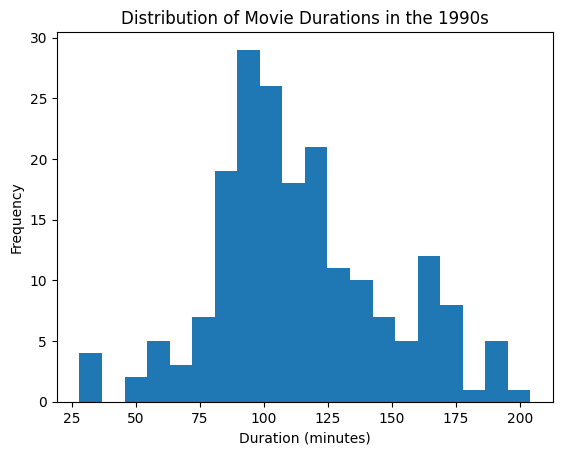

In [24]:
plt.hist(netflix_movie_1990_1999_df['duration'], bins=20)
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [25]:
duration=95
print("duration = " + str(duration))

duration = 95


In [26]:
netflix_action_movie_1990_1999_df = netflix_movie_1990_1999_df[ netflix_movie_1990_1999_df["genre"]=="Action"]
netflix_action_movie_1990_1999_df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
507,s508,Movie,Andaz Apna Apna,Rajkumar Santoshi,"Aamir Khan, Salman Khan, Raveena Tandon, Karisma Kapoor, Paresh Rawal, Mehmood, Deven Verma, Jagdeep, Shakti Kapoor",India,"May 11, 2020",1994,160,"Broke and with no concrete plans for the future, two young men discover that a stunning heiress lives nearby and try to charm her into marriage.",Action
627,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"Mike Myers, Heather Graham, Michael York, Robert Wagner, Rob Lowe, Seth Green, Mindy Sterling, Verne Troyer, Elizabeth Hurley, Will Ferrell",United States,"December 1, 2019",1999,95,"When diabolical genius Dr. Evil travels back in time to steal superspy Austin Powers's ""mojo,"" Austin must return to the swingin' '60s himself.",Action
687,s688,Movie,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, Téa Leoni, Tchéky Karyo, Theresa Randle, Joe Pantoliano, Emmanuel Xuereb, Michael Imperioli, Nestor Serrano, Julio Oscar Mechoso",United States,"October 1, 2019",1995,119,"In this fast-paced actioner, two Miami narcotics cops are hot on the trail of a master crook who has snatched $100 million worth of heroin.",Action
756,s757,Movie,Barsaat,Rajkumar Santoshi,"Twinkle Khanna, Bobby Deol, Danny Denzongpa, Raj Babbar, Ashwin Kaushal, Mukesh Khanna, Harish Patel",India,"April 1, 2018",1995,166,"A naïve young man and a rich city girl fall in love. Her stepfather, however, doesn't approve of the match and will stop at nothing to split the pair.",Action
1002,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Dave Chappelle, Nicole Ari Parker, Graham Beckel, Robert Miranda, Olek Krupa, Saverio Guerra, Richard C. Sarafian, William Forsythe",Germany,"January 1, 2021",1999,94,A jewel thief returns to his hiding place after a stint in jail — only to find that his diamond is buried under a newly constructed police station.,Action
1235,s1236,Movie,Casino Tycoon,Wong Jing,Wong Jing,Hong Kong,"August 1, 2018",1992,125,"When Japanese troops invade Hong Kong, young Benny Ho flees to Macau and rises to the top of the city's casino business with pluck, diligence and wit.",Action
1236,s1237,Movie,Casino Tycoon 2,Wong Jing,Dennis Chan,Hong Kong,"August 16, 2018",1992,108,Casino mogul Benny Ho wields enormous power. But a feud with his former partner and a massive fraud scheme soon threaten his family and his empire.,Action
1604,s1605,Movie,Dante's Peak,Roger Donaldson,"Pierce Brosnan, Linda Hamilton, Elizabeth Hoffman, Jamie Renée Smith, Jeremy Foley, Charles Hallahan, Grant Heslov, Kirk Trutner, Arabella Field, Tzi Ma",United States,"September 1, 2019",1997,108,"When a volcanologist comes to investigate the recent rumblings of a dormant volcano, a massive eruption has everyone in town fighting for their lives.",Action
1849,s1850,Movie,Dragonheart,Rob Cohen,"Sean Connery, Dennis Quaid, David Thewlis, Pete Postlethwaite, Dina Meyer, Jason Isaacs, Brian Thompson, Julie Christie",United States,"January 1, 2020",1996,103,"In ancient times when majestic fire-breathers soared through the skies, a knight comes face to face and heart to heart with the last dragon on Earth.",Action
2038,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashibara, Yuko Miyamura, Yuriko Yamaguchi, Fumihiko Tachiki, Motomu Kiyokawa, Koichi Yamadera, Takehito Koyasu, Hiro Yuki, Miki Nagasawa, Mugihito, Akira Ishida",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathetic teen Shinji joins his father's group NERV to fight the Angels. But the truth may destroy them all.",Action


In [27]:
short_movie_count=0

for label, row in netflix_action_movie_1990_1999_df.iterrows():
    if(row['duration']<90):
        short_movie_count=short_movie_count+1

print(short_movie_count)

8
